<a href="https://colab.research.google.com/github/BaidyaSubhadip/Machine-Learning-Models-from-scratch/blob/main/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')


In [3]:
train.shape

(42000, 785)

In [4]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
val_count = train['label'].value_counts()
print(val_count)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


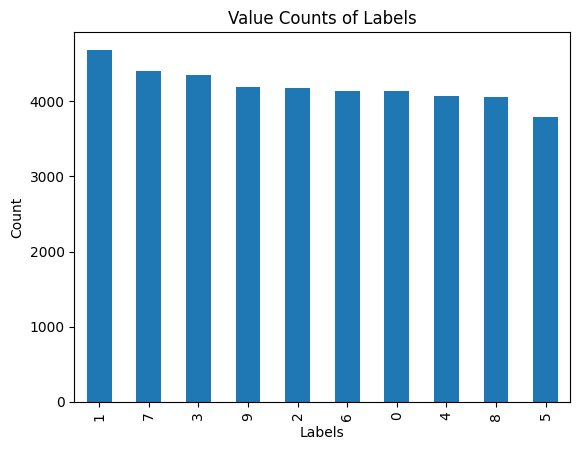

In [7]:
val_count.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Value Counts of Labels')
plt.show()

In [8]:
data = np.array(train)
m, n = data.shape
np.random.shuffle(data)

In [9]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [10]:
Y_train

array([7, 5, 7, ..., 7, 9, 3])

Will build a simple two layer neural network model. Input layer will have 784 units corresponding to 784 pixels in each 28*28 sized image. The first hidden layer will have 10 units with ReLu activation. And the final output layer will have 10 units corresponing to a softmax function indicating the probabilty of 0 to 9 digit.


In [11]:
def ReLU(x):
    return np.maximum(x, 0)

In [12]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [23]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [14]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [15]:
def ReLU_deriv(Z):
    return Z > 0

In [16]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [17]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [18]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [19]:
def get_predictions(A2):
    return np.argmax(A2, 0)


In [20]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [29]:
def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100== 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
  return W1, b1, W2, b2

In [30]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 1000)

Iteration:  0
[1 7 1 ... 3 3 3] [7 5 7 ... 7 9 3]
0.09758536585365854
Iteration:  100
[7 5 7 ... 9 9 3] [7 5 7 ... 7 9 3]
0.6488048780487805
Iteration:  200
[7 5 7 ... 7 9 3] [7 5 7 ... 7 9 3]
0.7787073170731708
Iteration:  300
[7 5 7 ... 7 9 3] [7 5 7 ... 7 9 3]
0.8148292682926829
Iteration:  400
[7 5 7 ... 7 9 3] [7 5 7 ... 7 9 3]
0.8363170731707317
Iteration:  500
[7 5 7 ... 7 9 3] [7 5 7 ... 7 9 3]
0.8502195121951219
Iteration:  600
[7 5 7 ... 7 9 3] [7 5 7 ... 7 9 3]
0.8595365853658536
Iteration:  700
[7 5 7 ... 7 9 3] [7 5 7 ... 7 9 3]
0.8678536585365854
Iteration:  800
[7 5 7 ... 7 9 3] [7 5 7 ... 7 9 3]
0.8739268292682927
Iteration:  900
[7 5 7 ... 7 9 3] [7 5 7 ... 7 9 3]
0.878780487804878


In [31]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


In [32]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


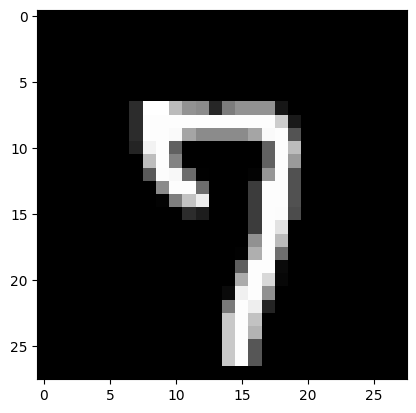

Prediction:  [1]
Label:  1


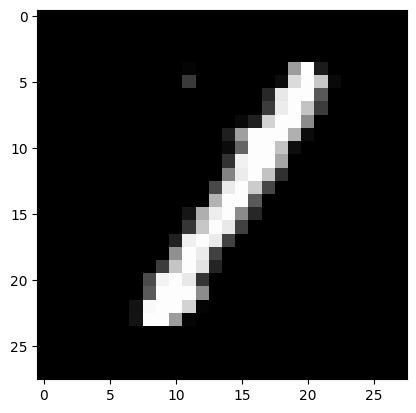

Prediction:  [2]
Label:  2


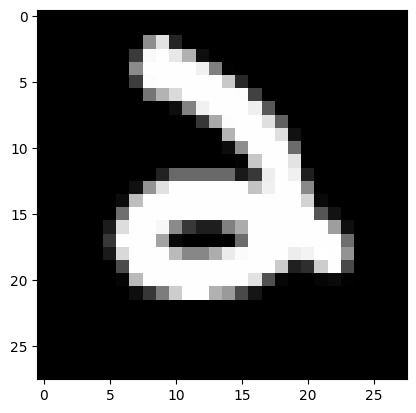

Prediction:  [5]
Label:  5


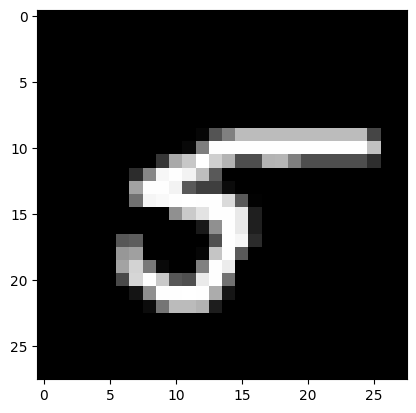

In [33]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(10, W1, b1, W2, b2)
test_prediction(22, W1, b1, W2, b2)
test_prediction(36, W1, b1, W2, b2)

In [34]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 9 5 2 6 0 8 3 2 0 3 9 1 8 4 1 3 4 4 4 0 6 4 8 1 1 4 6 4 9 3 9 3 1 8 8 8
 0 3 4 0 7 8 0 3 1 2 7 6 0 9 0 9 1 4 8 8 8 6 1 5 8 2 3 5 8 1 8 6 0 1 5 1 0
 9 9 1 0 7 2 6 7 1 4 6 5 2 7 4 4 0 8 1 8 0 1 9 7 3 5 5 7 4 0 9 9 1 7 3 2 4
 2 2 3 2 8 4 7 3 9 9 5 8 4 8 7 9 4 1 6 0 9 9 6 1 3 9 4 9 3 2 3 4 6 6 4 5 1
 5 5 8 0 2 4 3 6 9 9 8 3 8 5 2 5 5 1 5 1 0 6 5 4 2 3 6 9 2 2 5 3 4 8 3 9 1
 8 3 7 5 8 5 3 6 0 0 6 4 6 8 2 0 9 5 7 7 5 9 7 9 0 4 9 6 0 5 8 8 9 7 9 8 6
 3 6 1 1 0 1 0 1 3 6 6 1 2 8 4 6 0 3 2 9 1 0 3 1 7 1 7 1 3 2 8 1 3 8 3 5 5
 1 6 7 9 4 1 9 4 4 0 5 1 9 1 5 8 4 0 8 0 7 7 7 6 8 6 6 8 4 7 2 0 6 7 0 9 7
 5 2 9 7 8 6 3 8 3 1 1 6 2 3 9 2 8 7 8 6 2 4 8 9 3 8 1 4 1 0 2 2 7 2 0 6 0
 5 7 3 4 5 1 7 0 8 5 3 9 2 2 0 4 5 9 3 7 5 2 5 3 2 5 0 3 8 9 5 6 1 2 6 9 9
 5 2 7 3 6 3 1 9 1 0 0 3 9 6 1 3 1 8 8 9 4 0 5 4 3 3 8 1 7 0 3 2 4 6 1 1 8
 7 7 7 9 1 2 7 0 4 6 1 0 9 1 4 8 1 0 4 7 8 6 3 8 4 6 0 3 4 0 5 3 1 0 2 5 7
 9 4 9 3 9 3 9 0 6 3 7 1 6 4 2 3 0 8 2 5 9 3 3 2 0 4 1 7 3 4 1 3 5 8 7 8 1
 7 1 7 3 1 3 0 9 6 3 9 1 

0.887